### Equivalence Relations

In [ ]:
# Function to check if a US phone number is valid.
# The cases are equivalence classes (i.e., categories of correct or incorrect formats).

import re

def is_valid_us_phone(phone):
    # Regex: (xxx) xxx-xxxx or xxx-xxx-xxxx
    pattern = r"^(\(\d{3}\)\s?|\d{3}-)\d{3}-\d{4}$"
    return bool(re.match(pattern, phone))

# Equivalence class test cases
test_cases = {
    "Valid format": "123-456-7890",
    "Valid format with parentheses": "(123) 456-7890",
    "Wrong separator": "123.456.7890",
    "Too short": "123-4567",
    "Too long": "123-456-789012",
    "Contains letters": "123-ABC-7890",
    "Empty input": ""
}

for desc, case in test_cases.items():
    print(f"{desc:30} -> {is_valid_us_phone(case)}")


Valid format                   -> True
Valid format with parentheses  -> True
Wrong separator                -> False
Too short                      -> False
Too long                       -> False
Contains letters               -> False
Empty input                    -> False


In [10]:
is_valid_us_phone("123")

False

### Partial Orders and Hasse Diagrams

In [ ]:
# Using divisibility as the partial order, create a Hasse diagram given a set of integers.

import matplotlib.pyplot as plt

def hasse_edges(numbers):
    """Return edges of Hasse diagram for divisibility poset."""
    numbers = sorted(set(numbers))
    edges = []
    for i in numbers:
        for j in numbers:
            if i != j and j % i == 0:
                # keep edge if there's no intermediate k with i|k and k|j
                if not any(k != i and k != j and k % i == 0 and j % k == 0 for k in numbers):
                    edges.append((i, j))
    return edges

def plot_hasse(numbers):
    numbers = sorted(set(numbers))
    edges = hasse_edges(numbers)

    # assign "levels" by number of divisors
    levels = {}
    for n in numbers:
        levels[n] = sum(1 for d in numbers if n % d == 0)

    # invert levels: smaller numbers get lower y
    max_level = max(levels.values())
    for n in numbers:
        levels[n] = max_level - levels[n]

    # position nodes: x = index within level, y = level
    positions = {}
    by_level = {}
    for n, lvl in levels.items():
        by_level.setdefault(lvl, []).append(n)

    for lvl, nodes in by_level.items():
        for i, n in enumerate(nodes):
            positions[n] = (i - len(nodes)/2, lvl)

    #plt.figure(figsize=(8,6))

    # draw edges first
    for a,b in edges:
        x1,y1 = positions[a]
        x2,y2 = positions[b]
        plt.plot([x1,x2],[y1,y2], "k-", zorder=1)

    # draw nodes second
    for n, (x,y) in positions.items():
        plt.scatter(x, y, s=1000, color="lightblue", edgecolor="black", zorder=2)
        plt.text(x, y, str(n), ha="center", va="center", fontsize=12, zorder=3)

    plt.axis("off")
    plt.title("Hasse Diagram (Divisibility)")
    plt.show()


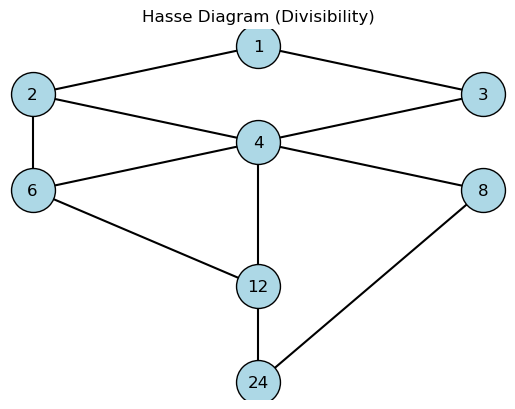

In [19]:
# Example
plot_hasse([1, 2, 3, 4, 6, 8, 12, 24])